## This notebook will discuss the following:
* [Density and Contour Plots](#scrollTo=otqdq2f9vdnZ&line=1&uniqifier=1)
* [Visualizing a Three-Dimensional Function](#scrollTo=AdQrc2XDvdnk)
* [Ejercicios de trazado de contornos](#scrollTo=_l0xh9yg7Opa&line=1&uniqifier=1)

# Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.
This section looks at several examples of using these. We'll start by setting up the notebook for plotting and importing the functions we will use: 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_theme()

## Visualizing a Three-Dimensional Function

We'll start by demonstrating a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$:

In [ ]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

In [ ]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

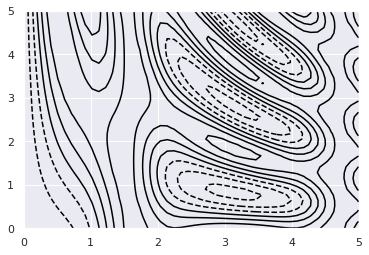

In [ ]:
plt.contour(X, Y, Z, colors='black');

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the ``cmap`` argument.
Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

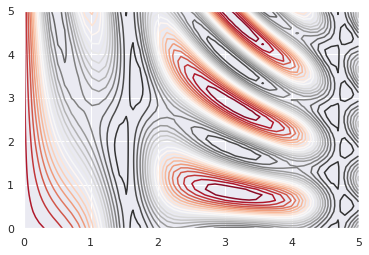

In [ ]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Here we chose the ``RdGy`` (short for *Red-Gray*) colormap, which is a good choice for centered data.
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the ``plt.cm`` module:
```
plt.cm.<TAB>
```

Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end), which uses largely the same syntax as ``plt.contour()``.

Additionally, we'll add a ``plt.colorbar()`` command, which automatically creates an additional axis with labeled color information for the plot:

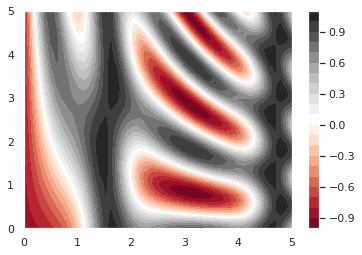

In [ ]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired.
This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.

The following code shows this:

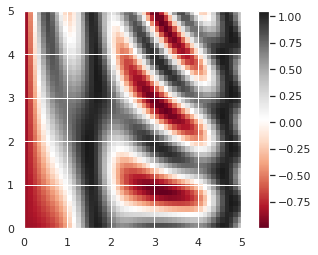

In [ ]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()

There are a few potential gotchas with ``imshow()``, however:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting.

Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the ``alpha`` parameter) and overplot contours with labels on the contours themselves (using the ``plt.clabel()`` function):

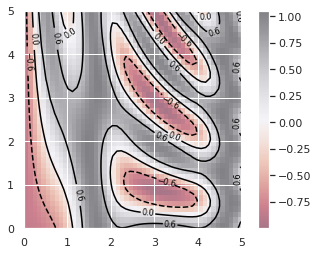

In [ ]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

The combination of these three functions—``plt.contour``, ``plt.contourf``, and ``plt.imshow``—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.
For more information on the options available in these functions, refer to their docstrings.

#Ejercicios de Trazado de Contornos

1) Busque y suba un dataset con datos para representación en 3D (ejemplo: altura, latitud, longitud) y visualice los 10 primeros records del dataset:

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url)

print(df.head(10))

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
5  4.6  3.4  1.4  0.3  Iris-setosa
6  5.0  3.4  1.5  0.2  Iris-setosa
7  4.4  2.9  1.4  0.2  Iris-setosa
8  4.9  3.1  1.5  0.1  Iris-setosa
9  5.4  3.7  1.5  0.2  Iris-setosa


2) Visualice los datos utilizando un contour plot sencillo:

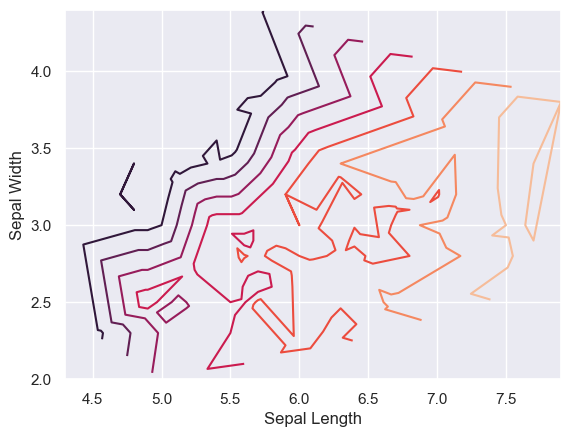

In [4]:
# Cargar los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
dataset = pd.read_csv(url, names=names)

# Crear gráfico de contorno
fig, ax = plt.subplots()
ax.tricontour(dataset.sepal_length, dataset.sepal_width, dataset.petal_length)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
plt.show()

3) Cree 3 visualizaciones diferentes para el contour plot, modificando colores, cambios de densidad en las líneas y agregue un colorbar al plot para representar uno de los atributos: 

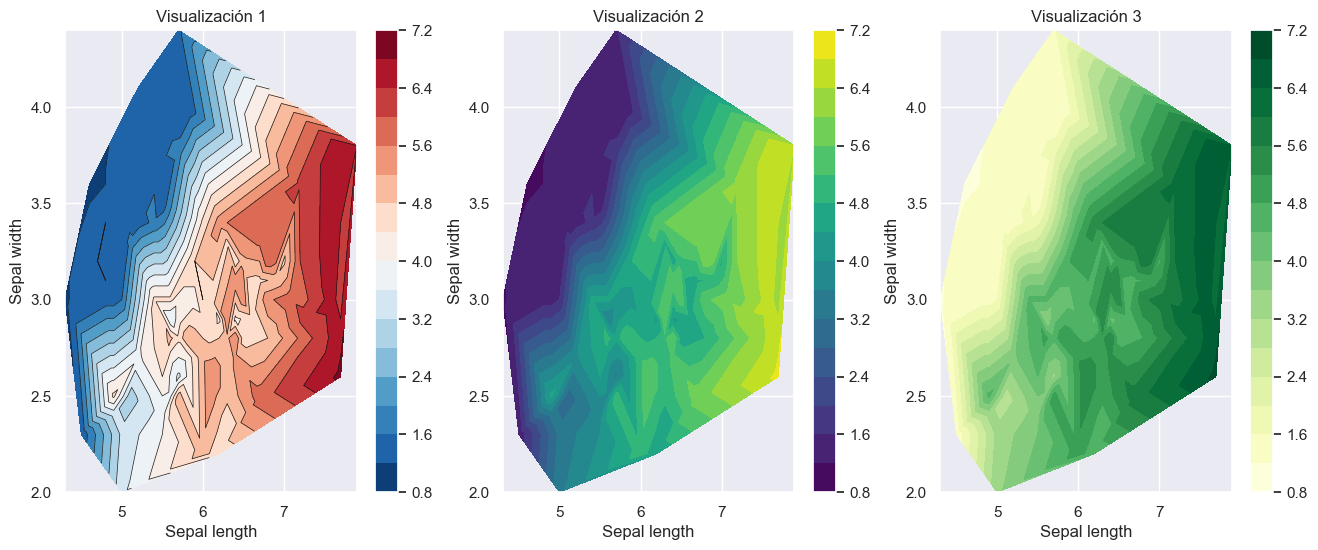

In [5]:
# Crear contour plot
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# Visualización 1
axs[0].tricontour(dataset.sepal_length, dataset.sepal_width, dataset.petal_length, levels=14, linewidths=0.5, colors='k')
cntr1 = axs[0].tricontourf(dataset.sepal_length, dataset.sepal_width, dataset.petal_length, levels=14, cmap="RdBu_r")
fig.colorbar(cntr1, ax=axs[0])
axs[0].set(title='Visualización 1', xlabel='Sepal length', ylabel='Sepal width')

# Visualización 2
cntr2 = axs[1].tricontourf(dataset.sepal_length, dataset.sepal_width, dataset.petal_length, levels=14, cmap="viridis")
fig.colorbar(cntr2, ax=axs[1])
axs[1].set(title='Visualización 2', xlabel='Sepal length', ylabel='Sepal width')

# Visualización 3
cntr3 = axs[2].tricontourf(dataset.sepal_length, dataset.sepal_width, dataset.petal_length, levels=14, cmap="YlGn")
fig.colorbar(cntr3, ax=axs[2])
axs[2].set(title='Visualización 3', xlabel='Sepal length', ylabel='Sepal width')

plt.show()